In [4]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
movie_df = pd.read_csv('data/tmdb_5000_movies.csv')

numeric_df = movie_df.select_dtypes(include=['int64', 'float64']).dropna()

In [7]:
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
display(numeric_df.head())

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


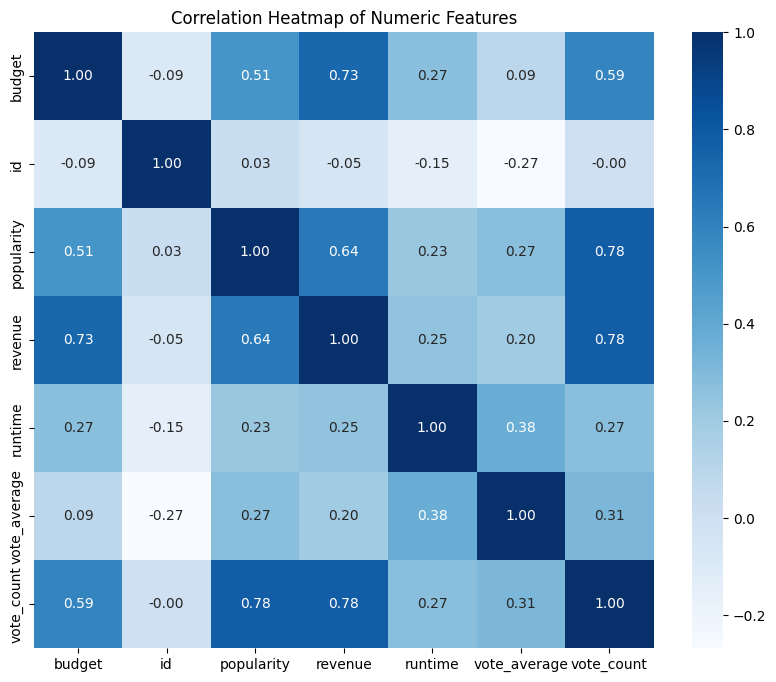

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [10]:
# Compute correlation matrix
corr_matrix = numeric_df.corr().abs()

# Unstack and sort
sorted_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Filter out self-correlations
strong_corr = sorted_corr[(sorted_corr < 1.0) & (sorted_corr > 0.5)]

print("Top Correlated Variable Pairs:\n")
display(strong_corr.head(10))

Top Correlated Variable Pairs:



vote_count  revenue       0.781462
popularity  vote_count    0.778098
budget      revenue       0.730798
popularity  revenue       0.644677
vote_count  budget        0.593135
budget      popularity    0.505346
dtype: float64

In [11]:
# Check columns
movie_df.columns

# Select relevant columns
data = movie_df[['vote_count', 'popularity', 'budget', 'revenue', 'title']].copy()

# Remove rows with zero or missing values
data = data[(data['budget'] > 0) & (data['revenue'] > 0)]

# Check summary
data.describe()

,vote_count,popularity,budget,revenue
count,3229.000000,3229.000000,3.229000e+03,3.229000e+03
mean,977.287395,29.033689,4.065444e+07,1.212430e+08
std,1414.309577,36.165730,4.439674e+07,1.863029e+08
min,0.000000,0.019984,1.000000e+00,5.000000e+00
25%,178.000000,10.446722,1.050000e+07,1.700000e+07
50%,471.000000,20.410354,2.500000e+07,5.518472e+07
75%,1148.000000,37.335721,5.500000e+07,1.462920e+08
max,13752.000000,875.581305,3.800000e+08,2.787965e+09


In [29]:
# Remove rows with NaN (missing) values
data = data.dropna(subset=['vote_count', 'popularity', 'budget', 'revenue'])

# Reset index after cleaning
data = data.reset_index(drop=True)

# Verify again
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   vote_count  3229 non-null   int64  
 1   popularity  3229 non-null   float64
 2   budget      3229 non-null   int64  
 3   revenue     3229 non-null   int64  
 4   title       3229 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 126.3+ KB


,vote_count,popularity,budget,revenue
count,3229.000000,3229.000000,3.229000e+03,3.229000e+03
mean,977.287395,29.033689,4.065444e+07,1.212430e+08
std,1414.309577,36.165730,4.439674e+07,1.863029e+08
min,0.000000,0.019984,1.000000e+00,5.000000e+00
25%,178.000000,10.446722,1.050000e+07,1.700000e+07
50%,471.000000,20.410354,2.500000e+07,5.518472e+07
75%,1148.000000,37.335721,5.500000e+07,1.462920e+08
max,13752.000000,875.581305,3.800000e+08,2.787965e+09


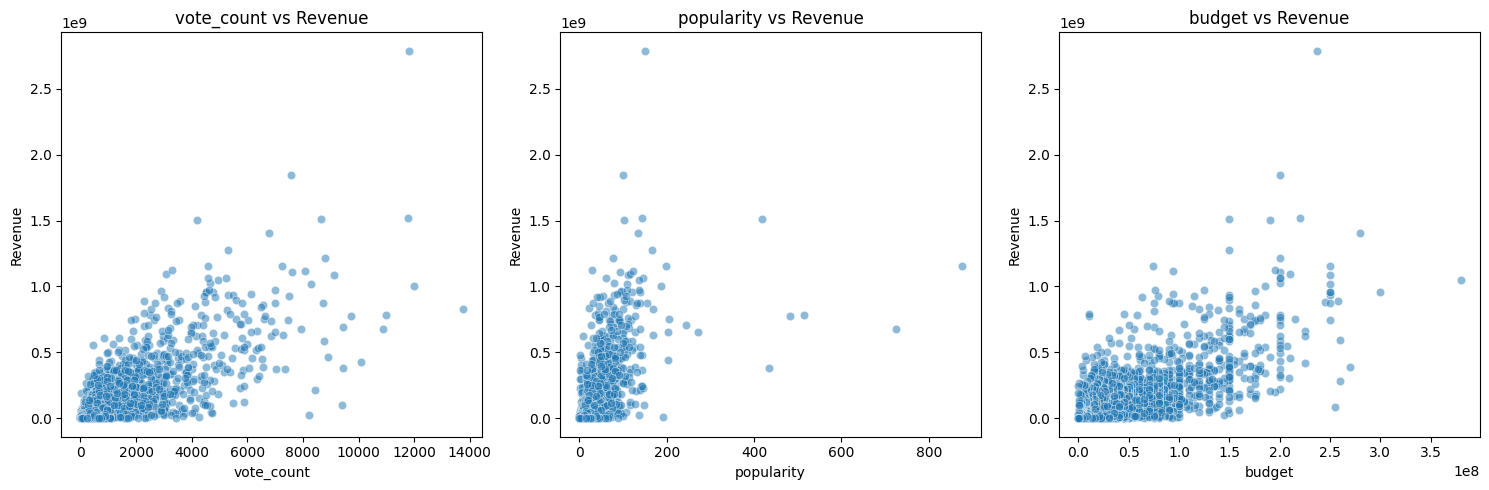

In [30]:
features = ['vote_count', 'popularity', 'budget']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=data, x=feature, y='revenue', alpha=0.5)
    plt.title(f'{feature} vs Revenue')
    plt.xlabel(feature)
    plt.ylabel('Revenue')

plt.tight_layout()
plt.show()

In [47]:
# Train data
X = data[['vote_count', 'popularity', 'budget']]
y = data[['revenue']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
# Check model accuracy
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Model Evaluation:
R² Score: 0.6562
MAE: 65,625,449.43
RMSE: 131,826,516.72
Intercept: [-17919131.29462467]
Coefficients: [[5.90660529e+04 4.30381468e+05 1.67140227e+00]]


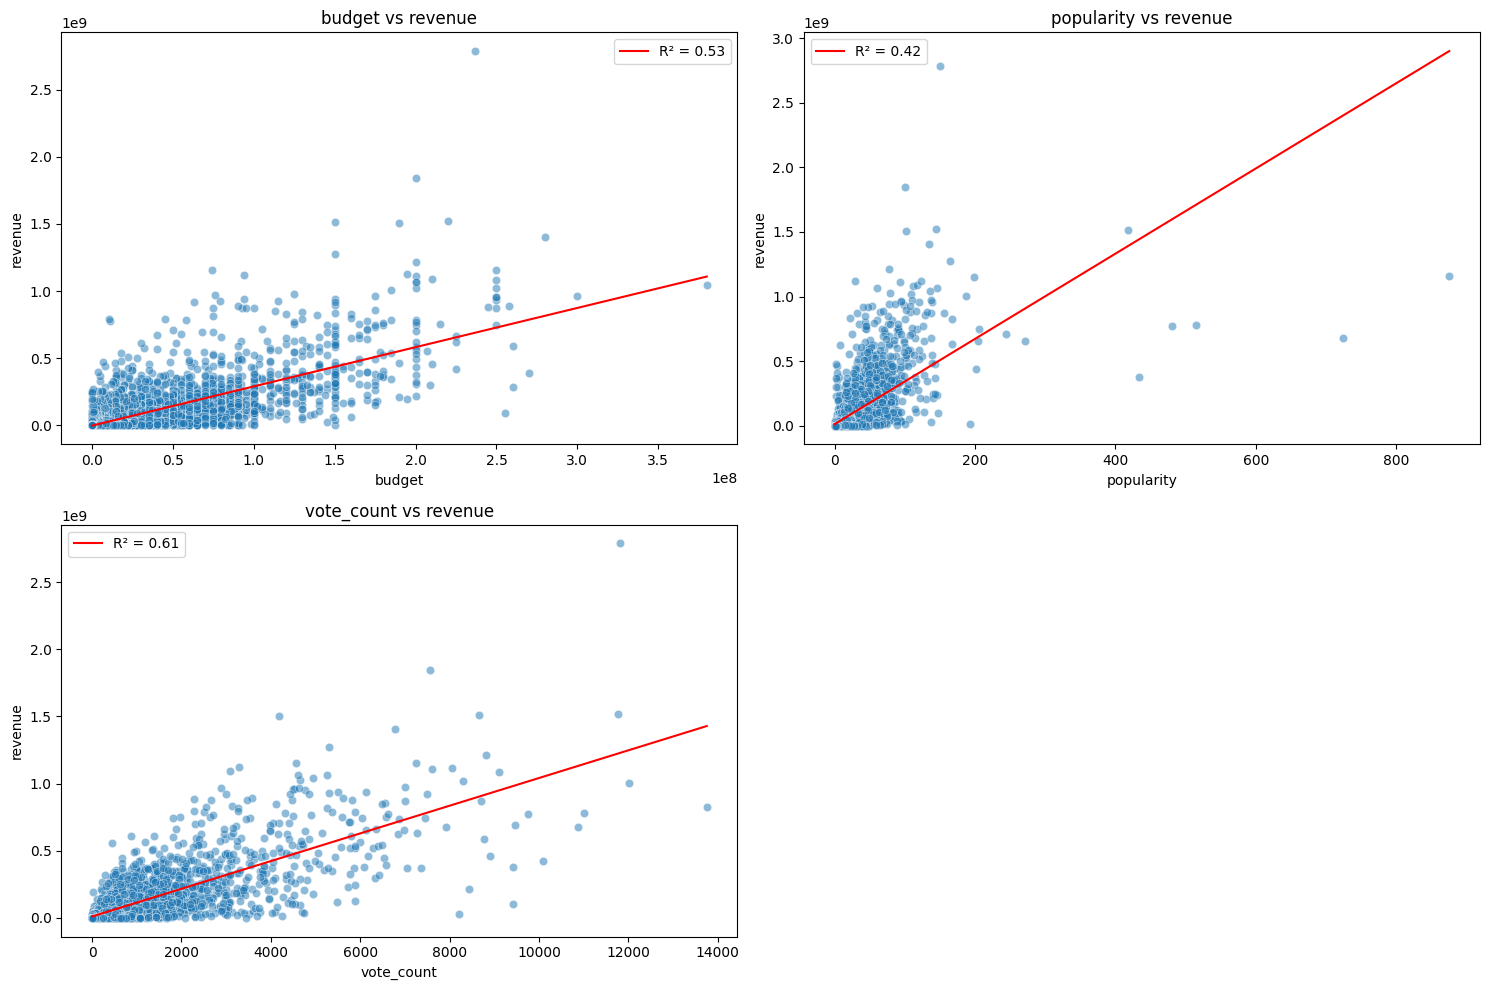

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

features = ['budget', 'popularity', 'vote_count']
target = 'revenue'

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns of plots

    X = movie_df[[feature]]
    y = movie_df[[target]]

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    sns.scatterplot(x=feature, y=target, data=movie_df, alpha=0.5)
    sns.lineplot(x=movie_df[feature], y=y_pred.flatten(), color='red', label=f'R² = {r2:.2f}')
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Example prediction of 100M movie budget
example_budget = np.array([[100000000]])  # $100M
predicted_revenue = model.predict(example_budget)[0][0]
print(f"Predicted revenue for $100M budget: ${predicted_revenue:,.2f}")

Predicted revenue for $100M budget: $290,831,988.66


d:\UNY\Semester5\AplikasiWeb\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [51]:
example_values = np.array([[100_000_000, 20.5, 1500]])  # [budget, popularity, vote_count]
predicted_revenue = model.predict(example_values)[0][0]

print("Predicted revenue for:")
print("Budget: $100M")
print("Popularity: 20.5")
print("Vote Count: 1500")
print(f"Estimated Revenue: ${predicted_revenue:,.2f}")

Predicted revenue for:
Budget: $100M
Popularity: 20.5
Vote Count: 1500
Estimated Revenue: $5,906,596,200,129.74


d:\UNY\Semester5\AplikasiWeb\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
# Save trained model
joblib.dump(model, 'movie_revenue_regression.pkl')
print("✅ Model saved successfully as 'movie_revenue_regression.pkl'")

✅ Model saved successfully as 'movie_revenue_regression.pkl'
